<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Data Analysis and Visualization</div>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# p-Values, Effect Sizes, and Statistical Power

In the earlier lessons on hypothesis testing the idea of a **p-value** was introduced. The p-value measures the probability that a measurement of the difference between two treatments or populations, as measured by a **t-** or **F-statistic**, would be observed due to random sampling effects. When the p-value was introduced, it was mentioned that the p-value should not be confused with a measure of the *strength* of a particular effect. To demonstrate this we showed that a p-value will decline as the number of observations in a study increases. In this notebook we will revisit the relationship between p-value and sample size, provide an explanation of how to measure effect strength, and introduce the concept of statistical power. 

## Type I and Type II errors

Let's use our previous example of a one-sample t test, in which we want to know if a sample differs from a known value. When conducting this analysis there are two kinds of errors that we can make:

* **Type I error**: Because of sampling randomness, our test discovers a statistically significant difference between the sample and the target value even though no such difference exists 

* **Type II error**: We fail to reject the null hypothesis even when there really is a difference between the sample and the target value

The table below summarizes the four possible outcomes:

  | | Means Differ | Means Same 
 --- | :---: | :---: |
 Significant test | OK |  Type I error
 Non-significant test | Type II error | OK
 
The p-value is a measure of type I error. In the context of a one-sample t-test, a p-value of 0.05 should be interpreted as meaning that given the data that we are working with, there is a five percent chance that random sampling has caused us to reject the null hypothesis inappropriately. 

### Type I error

Let's take a look at type 1 error with a code example. In this example, we are going to create a dataset whose mean does **not**  differ from the target value, and then repeatedly sample from this dataset and conduct a t-test of the difference between the sample and the known mean. We will use a simulated set of student test scores drawn from a population with a mean of 85 and SD of 5 as our sample. 

#### Example 1

In [3]:
from scipy import stats
import numpy as np

# set the parameters for our 'true population'
mean = 85
sd = 5

# set the target_value that we want to compare our population to
target_value = 85

# set the sample size - I chose 20 as an initial sample_size we will change it later
sample_size = 1000

# set the number of times we are going to test the t-test
replicates = 100

# define a function that is going to carry out a one-sample t-test and return the results
def oneSample(mean, sd, sample_size):
    sample = np.random.normal(mean, sd, sample_size)            # take a random sample
    
    testresult = stats.ttest_1samp(sample, target_value)         # compare the sample mean to the target value  
                                                        
    if testresult.pvalue < 0.05:
        significant = 1                                         # check if the result is significant
    else:
        significant = 0
    return(significant)                                         # return 1 if significant, 0 if not

# create a loop that uses oneSample to carry out numerous one-sample t-tests
counter = 0
for i in range(replicates):                                     # for a given number of comparisons
    counter += oneSample(mean, sd, sample_size)                  # count how many significant differences
falsepos = counter/replicates
    
    
print("Out of %s one-sample t-tests, %s (%s) gave significant results" % (replicates, counter, falsepos))
print("Sample drawn from population with mean %s, compared to target value of %s" % (mean, target_value))


Out of 100 one-sample t-tests, 6 (0.06) gave significant results
Sample drawn from population with mean 85, compared to target value of 85


Question - Run the code window above several times. Explain why you are seeing the results that you are seeing in terms of Type I error. 
* 
* 
* 
* 

Question - What do you predict will happen if we increase the value of the variable `sample_size`. Change it to a larger and larger sample. What should happen to the quality of our estimate of the mean? What changes in terms of our results? What does this tell you about Type I error?
* 
* 
* 
* 

(*hint* if you are stumped on the second question, go look at the <a href = 'http://www.ttable.org/uploads/2/1/7/9/21795380/published/9754276.png?1517416376'>table of t-statistics</a> again).

### Type 1 error and the level of significance

To reinforce what a p value does and doesn't mean, let's do a similar exercise, but in this case let's change our situation so that there IS a small difference between the population mean and our target value. We will keep all parameters the same, except this time we will draw our sample from a population that has a true mean of 86. 

#### Example 2

In [4]:
# set the parameters for our 'true population'
mean = 85.5
sd = 5

# set the target_value that we want to compare our population to
target_value = 85

# set the sample size - I chose 20 as an initial sample_size - we will change it later
sample_size = 10000

# set the number of times we are going to test the t-test
replicates = 100

# create a loop that uses oneSample to carry out numerous one-sample t-tests
counter = 0
for i in range(replicates):                                    
    counter += oneSample(mean, sd, sample_size)                  
truepos = counter/replicates                                    # note that this fraction now represents
                                                                # true positives
    
    
print("Out of %s one-sample t-tests, %s (%s) gave significant results" % (replicates, counter, truepos))
print("Sample drawn from population with mean %s, compared to target value of %s" % (mean, target_value))


Out of 100 one-sample t-tests, 100 (1.0) gave significant results
Sample drawn from population with mean 85.5, compared to target value of 85


Question - Run the code window above several times. Considering that there is a difference between the population mean and the target value, why aren't the results more different than what we saw before?
* 
* 
* 
* 

Question - What do you predict will happen if we increase the value of the variable `sample_size`? Change it to at least 100, 1000, and 10,000. What should happen to the quality of our estimate of the mean? What changes in terms of our results? Why is this different from the previous example? What does this tell you about the nature of the p-value?
* 
* 
* 
* 


## Effect sizes

In the exercises above we hopefully discovered something about the p-value and its limitations. In the first example, we compared two values and saw that no matter how large our sample size, we expect some rate of 'significant' results with sampled data *even when there was no true difference among the values*. 

In the second example, we saw that the level of significance is highly dependent on sample size, and that *the likelihood of achieving 'significance' is not just a function of the size of the difference between populations*. 

Although we demonstrated this with a one-sample t-test for the sake of simplicity, this relationship holds for all tests that report a p-value. 

So how do we account for this when we report the results of tests that return p-values? One way is that we can choose to report the **effect size** observed in our study. For means comparison tests the effect size is as simple as it sounds - it's just the difference between the treatment means, or in the case of our one-sample t-test above, between the mean and the target value.

This brings us to an interesting situation - a statistical test will tell us whether there is a significant difference between two values, but it is often up to the judgement of the researcher to determine whether the difference detected is meaningful. With that in mind - and using **Example 3** below answer the questions that follow. 

#### Example 3

In [5]:
# set the parameters for our 'true population', don't change these
mean = 85.8
sd = 5

# set the target_value that we want to compare our population to
target_value = 85.2

# set the sample size
sample_size = 912

sample = np.random.normal(mean, sd, sample_size)
testresult = stats.ttest_1samp(sample, target_value)

diff = abs(np.mean(sample)-target_value) ##added to key

print("Probability that that the intervention sample is different = %s" % (testresult.pvalue))
print("The difference between the intervention and the long term average is %s points out of 100" % diff) #added to key


Probability that that the intervention sample is different = 1.2700405865019887e-05
The difference between the intervention and the long term average is 0.7057312385939127 points out of 100


Question - Consider the following situation relating to **Example 3** . You are a superintendent of schools. One of the educators in your district proposes an educational intervention. Students in the `sample` population are those who have received the intervention, and their performance is compared to the long-term-average performance in the class, which is 85.2. Comparing the scores for 912 students who received the intervention, the difference is highly significant, and on those grounds the educator asks you to implement this intervention for all future students. What do you tell that educator, and why? 

* 
* 
* 
*

Modify the code above to report effect size alongside the p-value. Is this an improvement on your decision-making process? Why? 

* 
* 
* 
*


### Standardizing effect sizes

In the example above, we used a measure of performance that had inherent meaning - points along a standard grading scale, such that our effect size 'meant' something. Many comparisons in the life sciences are meaningful in this sense. If we are comparing the body mass of an organism, or time in milliseconds of a cellular response, or the percent change in a rate of reaction - these are all variables whose values are inherently meaningful to a researcher within a relevant field. 

We can imagine circumstances in which we are comparing things that are more abstract, however, such as the strength of a signal, or responses to a ratings question on a numerical scale. In these situations we may want to convert our effect sizes to a **standardized** measure of effect strength. Additionally, we will see below in the section on power analysis that converting effect strengths to a standardized measure can help us to perform analyses that let us 1) further illuminate our results (particularly negative results) and 2) plan experiments more effectively. 

One widely-known method for standardizing effect sizes is **Cohen's d**. For a t-test Cohen's d can be described as the difference between the means, or the mean and the target value, divided by (standardized by) the standard deviation.  

&emsp;&emsp;&emsp;&emsp; $ d = \frac{\text{difference between means}}{\text{standard deviation of the data}} $

In practice this is a little bit trickier than it may seem, because the 'standard deviation of the data' will vary depending on what variety of test we are working with. A two-sample t-test, for example, should use the pooled variance of the data across the two samples, which will account for differing sample sizes between samples. Happily, for the one-sample t-test we are applying here we can simply use the standard deviation of the sample (which upon a little consideration we should realize will be the same as the standard deviation of the differences between the sample means and the target value).

### Exercise 1
As a review of how to define functions write a function in python called `cohen_d_onesample` that will calculate Cohen's d for a one-sample t-test and takes as arguments the sample data and the mean to which it should be compared. Demonstrate that the function works using the test data and answer provided.

In [6]:
import numpy as np
#

def cohen_d_onesample(sample, mean):
    s = np.std(sample)
    xdiff = abs(np.mean(sample)-mean)
    d = xdiff / s
    return(d)

#
### Demonstrate that the function works using the test data below
#

data = [83,84,84,85,85,85,86,86,87,88]
target_value = 85

#your answer for the test data should be d = 0.2116036847575775

cohen_d_onesample(data, target_value)


0.2116036847575775

### Interpreting Cohen's d

Cohen's d can be interpreted as the difference in means as expressed in standard deviations from the mean. As mentioned in the <a href ='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/'>reading</a> that we did for this class session, Cohen's d provides us with the ability to interpret standardized effect sizes in a rough way. In general, it looks like this:

Cohen's d | Interpretation
---| ---
0.2 | small effect
0.5 | medium effect
0.8 | large effect
1.3 | very large effect

The best way to get a sense of what these values mean in practice is probably playing with <a href = 'https://rpsychologist.com/cohend/'>these interactive visualizations</a>.

## Type II error, Statistical Power and Power Analysis


In the second example on this worksheet, on Type 1 error and the level of significance, you were asked: "why aren't the results more different than what we saw before?" A statistician would probably answer "because the analysis did not have enough power to detect an effect of that size".

**Statistical power** is a statement about Type II error - in the context of a t-test this can be framed as *the likelihood that we will detect a given difference between means at a certain significance threshhold given the data we are workingn with*. 

Statistical power depends on effect size, sample size, and $\alpha$, the minimum p-value that we will accept as evidence of a difference between groups in a statistical test. We will continue to use $\alpha = 0.05$ for these examples, but be aware that in many cases we may want to adjust this value downwards, especially when we are making multiple comparisons within a single study. 

In other words, if we know the effect size, the $\alpha$ value, and the sample size, we can calculate the likelihood that a given statistical test will detect that difference. Power can therefore be thought of as:

&emsp;&emsp;&emsp;&emsp; $ {\text{Power}} = 1 - {\text{(the probability of committing a Type II error)}}$

The `statsmodels` library provides a set of functions (see 'Power and Sample Size Calculations' on <a href ='https://www.statsmodels.org/stable/stats.html'>this page</a>) that can be used to calculate statistical power for different tests. 

We are going to use the function `tt_solve_power` which works in a different way than what we have seen before. We are going to provide it with three parameters and designate the parameter we want to know, power, as 'None'. The function will then return the value for statistical power. The parameters are:

* `nobs`
* `effect_size`
* `alpha`
* `power`

The parameter `nobs` is short for 'n of observations', so this is sample size. Effect size has to be provided to this function in a standardized form, Cohen's d is the standard value used. The example below calculates statistical power for the effect size calculated for example 3 above, given a sample size of 20, and $\alpha = 0.05$. 

#### Example 4

In [7]:
import statsmodels.stats.power as power

sample_size = 20

power.tt_solve_power(nobs = sample_size, effect_size = 0.2116036847575775, alpha =0.05, power = None)


0.14650864935008967

Question - Can you interpret the power value in plain language? What do you think will happen if we adjust the sample size in **Example 4** upwards? Explain what you observe in the power value? What is happening to our rate of Type II error as the power value changes? 

* 
* 
* 
*


### Practical applications of power analysis - planning an experiment

Power analysis provides us a very important tool for experimental design. Consider the situation in which we are designing an experiment. By pickinga value for $\alpha$ we are stating the rate of Type I error we are willing to accept in our experiment. In the same way we can pick an acceptable rate of Type II error. A standard value for power is 0.8, which translates to 'if there is a difference between these groups, I want to be able to detect it 50% of the time. We can also use data from preliminary experiments to estimate the effect size that we might see. If we plug these values into the `tt_solve_power` function, then it will return the sample size needed to achieve that level of power. Try it for yourself in the exercise below:  

### Exercise 2

Imagine are running a very expensive experiment, and given the vagaries of sampling we want to design our study such that we have a 95% chance of detecting a difference between groups. Additionally, a false positive in this experiment could be very problematic, so we set our Type 1 error rate to 0.01. Preliminary investigation has indicated to us that the effect size we expect may be about 0.35 standard deviations away from the target value. Using this information, determine the sample size needed.


In [8]:
#

power.tt_solve_power(nobs = None, effect_size = 0.35, alpha =0.01, power = 0.95)

#

148.75791683206754

### Exercise 3

Expand on the analysis you performed above. Create a graph that shows how statistical power will change as sample size changes for effect sizes of 0.2, 0.5, 0.8 and 1.3. Label your lines with Cohen's 'interpretations' of different effect sizes. Compare $\alpha$ values of 0.01 and 0.05 either on the same plot or in a pair of plots.  

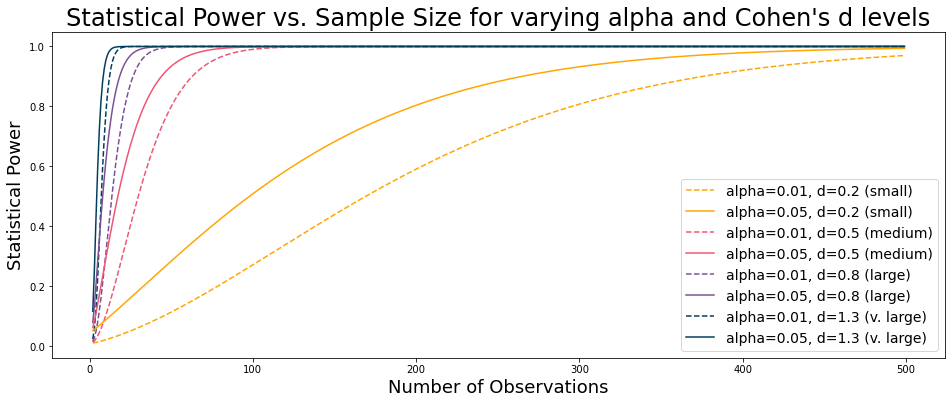

In [48]:
#

alphas = [0.01, 0.05]
ds = [0.2, 0.5, 0.8, 1.3]

leglabels = ['alpha=0.01, d=0.2 (small)', 'alpha=0.01, d=0.5 (medium)', 'alpha=0.01, d=0.8 (large)', 'alpha=0.01, d=1.3 (v. large)',
             'alpha=0.05, d=0.2 (small)', 'alpha=0.05, d=0.5 (medium)', 'alpha=0.05, d=0.8 (large)', 'alpha=0.05, d=1.3 (v. large)']

colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig, ax = plt.subplots(figsize = (16,6))

# ax.set_xscale('log') # uncomment one or both of these if you want to see plot on logarithmic axes
# ax.set_yscale('log')

for alpha in alphas:
    color_counter = 0
    for d in ds:
        x,y  = [],[]
        for n in range(500):
            x.append(n)
            y.append(power.tt_solve_power(nobs = n, effect_size = d, alpha =alpha, power = None))
        if alpha == 0.01:
            plt.plot(x,y, '--', color = colors[color_counter],label='placeholder')
            color_counter +=1
        else:
            plt.plot(x,y, color = colors[color_counter],label='placeholder')
            color_counter +=1
            
plt.xlabel('Number of Observations', size =18)
plt.ylabel('Statistical Power', size = 18)
plt.title('Statistical Power vs. Sample Size for varying alpha and Cohen\'s d levels', size =24)

# reorder the handles and labels into the pattern I want
## note that I had to assign 'placeholder' labels to each plot call to have a non-zero
## labels vector for the get_legend_handles_labels() function, as that causes handles to be empty

order = [0,4,1,5,2,6,3,7]
handles, labels = ax.get_legend_handles_labels()
plt.legend([handles[i] for i in order],[leglabels[i] for i in order],loc = 4, fontsize = 14)

plt.show()
#

Question - what can you learn from a comparison of your plots? 

* 
* 
* 
*

![TJU logo image](images/TJU_logo_image.png "TJU logo image")